## Libraries

In [100]:
import os
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sns  
from sklearn import linear_model 
import statsmodels.formula.api as smf 

## Dataset
Available from: https://www.kaggle.com/karthickveerakumar/salary-data-simple-linear-regression

In [101]:
#Using method get current working directory (CWD) to find the datase in the current directory     
PATH = os.getcwd()+"\Salary_Data.csv" 
#Now I use pandas to load the data and convert the csv into a dataframe
data = pd.read_csv(PATH) 
#Using the head method to see the head of the dataframe
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


## Data description: exploratory analysis

In [102]:
#Describe method will provide an overview of the data
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [103]:
# Analyze how closely the variables are related. The closer its value is to 1, the more variability the model explains.
data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


<AxesSubplot:>

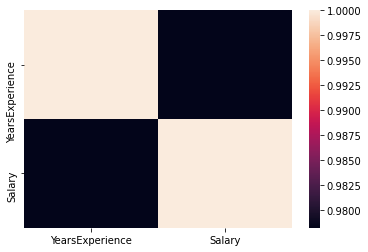

In [104]:
# Using seaborn to make a heat graph  
sns.heatmap(data.corr())

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

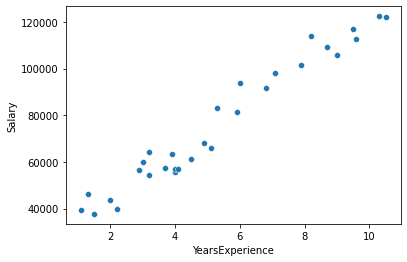

In [105]:
# The first parameter calls the data, then the x and y  
sns.scatterplot(data=data, x="YearsExperience",y="Salary")

## Regressão Linear usando Sklearn 

In [106]:
# Conducting LinearRegression method and inserting data using the fit method
# Additional bracket to transform it into 2D
lm = linear_model.LinearRegression(). fit(data[["YearsExperience"]],data[["Salary"]])
# Using the predict method
result=lm.predict (data[["YearsExperience"]])

In [107]:
# Creating a new column to place contents of the result variable
data["Prediction-Sklearn"]= result
data.head()

,YearsExperience,Salary,Prediction-Sklearn
0,1.1,39343.0,36187.158752
1,1.3,46205.0,38077.151217
2,1.5,37731.0,39967.143681
3,2.0,43525.0,44692.124842
4,2.2,39891.0,46582.117306


In [108]:
# Create a new column to show the error salary minus prediction (expected values)
data["Prediction Error-Sklearn"] = data["Salary"]-data["Prediction-Sklearn"]
data.head()

,YearsExperience,Salary,Prediction-Sklearn,Prediction Error-Sklearn
0,1.1,39343.0,36187.158752,3155.841248
1,1.3,46205.0,38077.151217,8127.848783
2,1.5,37731.0,39967.143681,-2236.143681
3,2.0,43525.0,44692.124842,-1167.124842
4,2.2,39891.0,46582.117306,-6691.117306


<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

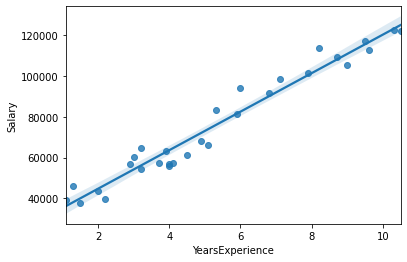

In [109]:
# Using seaborn and regplot to draw a line giving the margin of error
sns.regplot(x=data["YearsExperience"],y=data["Salary"])

Text(0.5, 1.0, 'Linear Regression: Years of Experience & Corresponging Salary ')

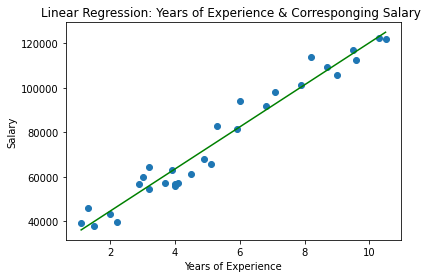

In [110]:
plt.scatter(data["YearsExperience"], data["Salary"])
plt.plot(data["YearsExperience"],data["Prediction-Sklearn"], color="green")
plt.ylabel("Salary")
plt.xlabel("Years of Experience")
plt.title("Linear Regression: Years of Experience & Corresponging Salary ")

In [111]:
 lm.coef_

array([[9449.96232146]])

In [112]:
lm.intercept_

array([25792.20019867])

In [113]:
#y = wo + w1*x
#Salary = 25792.20019867 + 9449.96232146 * YearsExperience 

In [114]:
#Testing for 9 years of experience
Salary = 25792.20019867 + 9449.96232146 * 9 
Salary

110841.86109181

In [115]:
lm.predict([[9]]) #colchetes pois exige-se 2D

array([[110841.86109176]])

## Regressão Linear usando Statsmodels

In [116]:
# OLS (ordinary list squares) is a method for linear regression (it is also the method used by Sklearn, although not explicitly)
#lm_version2 = smf.ols(formula = " Y ~ X") -> the variable Y is a function of x (Y is the dependent variable)
lm_version2 = smf.ols(formula = " Salary ~ YearsExperience",data=data).fit() #o método fit vai ajustar o modelo conforme os dados 
lm_version2.predict() #para encontrar os valores previstos. Não precisa colocar o x pq ele já entende que é o x
# Storing the prediction in a variable:
result2=lm_version2.predict()

In [117]:
#Checando a tabela como está:
data.head()

,YearsExperience,Salary,Prediction-Sklearn,Prediction Error-Sklearn
0,1.1,39343.0,36187.158752,3155.841248
1,1.3,46205.0,38077.151217,8127.848783
2,1.5,37731.0,39967.143681,-2236.143681
3,2.0,43525.0,44692.124842,-1167.124842
4,2.2,39891.0,46582.117306,-6691.117306


In [118]:
# Creating a new column:
data["Prediction-Statsmodels"]=result2
data.head()

,YearsExperience,Salary,Prediction-Sklearn,Prediction Error-Sklearn,Prediction-Statsmodels
0,1.1,39343.0,36187.158752,3155.841248,36187.158752
1,1.3,46205.0,38077.151217,8127.848783,38077.151217
2,1.5,37731.0,39967.143681,-2236.143681,39967.143681
3,2.0,43525.0,44692.124842,-1167.124842,44692.124842
4,2.2,39891.0,46582.117306,-6691.117306,46582.117306


In [119]:
# Creating the last column
data["Prediction Error-Startsmodels"] = data["Salary"] - data["Prediction-Statsmodels"]
data.head()

,YearsExperience,Salary,Prediction-Sklearn,Prediction Error-Sklearn,Prediction-Statsmodels,Prediction Error-Startsmodels
0,1.1,39343.0,36187.158752,3155.841248,36187.158752,3155.841248
1,1.3,46205.0,38077.151217,8127.848783,38077.151217,8127.848783
2,1.5,37731.0,39967.143681,-2236.143681,39967.143681,-2236.143681
3,2.0,43525.0,44692.124842,-1167.124842,44692.124842,-1167.124842
4,2.2,39891.0,46582.117306,-6691.117306,46582.117306,-6691.117306


In [120]:
# Summary - from Statsmodels 
lm_version2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Tue, 04 May 2021   Prob (F-statistic):           1.14e-20
Time:                        17:52:57   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""